In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df_HVC = pd.read_excel('HVC_final.xlsx')

In [ ]:
df_HVC

,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Physician_Segment_encoded,Brand_Rx
0,1,0,3-Low,0,0.245696,0.0
1,1,0,3-Low,0,0.245696,0.0
2,1,0,3-Low,0,0.245696,0.0
3,1,5,3-Low,0,0.245696,0.0
4,1,0,3-Low,0,0.245696,0.0
...,...,...,...,...,...,...
569995,0,0,3-Low,1,0.245696,0.0
569996,0,0,3-Low,0,0.245696,0.0
569997,0,0,3-Low,1,0.245696,0.0
569998,0,0,3-Low,1,0.245696,0.0


In [ ]:
(df_HVC['Brand_Rx'] == 0).sum()

368028

In [ ]:
# Split the dataframe into 3 equal parts
split_data = np.array_split(df_HVC, 10000)

# Access the first part of the split data
type(split_data)

list

### Applying different regression algorithms to assess best promotional channel for each of HCP

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

y_pred_f = []
y_test_f = []
for data in split_data:
# Assume that you have a Pandas dataframe called "df" with a feature column "X" and a target column "y"
  X = data[['Sales_Rep_Calls','Samples_Dropped',	'Emails_Delivered',	'Physician_Segment_encoded']]
  y = data['Brand_Rx']  # select the "y" column as the target

  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.015, random_state=42)
  model = DecisionTreeRegressor()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_test_f.append(y_test)
  y_pred_f.append(y_pred)
  

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
# Calculate the MSE
mse = mean_squared_error(y_test_f, y_pred_f)
print(f'MSE: {mse:.2f}')
rmse = math.sqrt(mse)
print(f'RMSE: {rmse:.2f}')
r2 = r2_score(y_test_f, y_pred_f)
print(f'R2: {r2:.2f}')

MSE: 0.95
RMSE: 0.97
R2: 0.37


In [ ]:
y_pred_f = np.array(y_pred_f)
y_pred_f = y_pred_f.tolist()

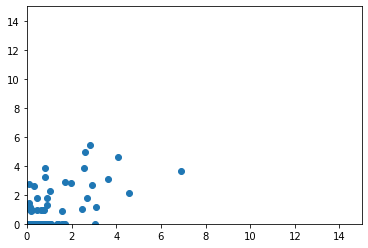

In [ ]:
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.scatter(x = y_pred_f[:100], y = y_test_f[:100])

# Show the plot
plt.show()

In [ ]:
# Import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

y_pred_f = []
y_test_f = []
for data in split_data:
# Assume that you have a Pandas dataframe called "df" with a feature column "X" and a target column "y"
  X = data[['Sales_Rep_Calls','Samples_Dropped',	'Emails_Delivered',	'Physician_Segment_encoded']]
  y = data['Brand_Rx']  # select the "y" column as the target

  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.015, random_state=42)
  # Create an instance of PolynomialFeatures
  poly_features = PolynomialFeatures(degree=7)

  # Transform the independent variable
  X_poly = poly_features.fit_transform(X)

  # Create an instance of LinearRegression
  model = LinearRegression()

  # Fit the model to the training data
  model.fit(X_poly, y)

  # Make predictions on the test data
  y_pred = model.predict(poly_features.transform(X_test))
  y_test_f.append(y_test)
  y_pred_f.append(y_pred)

In [ ]:
coefficients = model.coef_
coefficients.size

330

In [ ]:
np.mean(np.array(y_test_f))

0.6068615

In [ ]:
np.mean(np.array(y_pred_f))

0.6690643599236304

In [ ]:
y_test_f = [item[0] for item in np.array(y_test_f).tolist()]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
# Calculate the MSE
mse = mean_squared_error(y_test_f, y_pred_f)
print(f'MSE: {mse:.2f}')
rmse = math.sqrt(mse)
print(f'RMSE: {rmse:.2f}')
r2 = r2_score(y_test_f, y_pred_f)
print(f'R2: {r2:.2f}')

MSE: 0.67
RMSE: 0.82
R2: 0.56


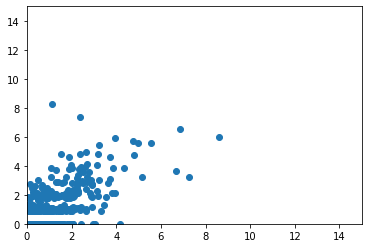

In [ ]:
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.scatter(x = y_pred_f[:1000], y = y_test_f[:1000])

# Show the plot
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

y_pred_f = []
y_test_f = []
for data in split_data:
# Assume that you have a Pandas dataframe called "df" with a feature column "X" and a target column "y"
  X = data[['Sales_Rep_Calls','Samples_Dropped',	'Emails_Delivered',	'Physician_Segment_encoded']]
  y = data['Brand_Rx']  # select the "y" column as the target

  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.015, random_state=42)
  # Create an instance of PolynomialFeatures

  # Create a gradient boosting regressor
  gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=7)

  # Fit the regressor to the training data
  gbr.fit(X_train, y_train)

  # Use the regressor to make predictions on the test data
  y_pred = gbr.predict(X_test)
  y_test_f.append(y_test)
  y_pred_f.append(y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
# Calculate the MSE
mse = mean_squared_error(y_test_f, y_pred_f)
print(f'MSE: {mse:.2f}')
rmse = math.sqrt(mse)
print(f'RMSE: {rmse:.2f}')
r2 = r2_score(y_test_f, y_pred_f)
print(f'R2: {r2:.2f}')

MSE: 0.93
RMSE: 0.97
R2: 0.38


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y_pred_f = []
y_test_f = []
for data in split_data:
# Assume that you have a Pandas dataframe called "df" with a feature column "X" and a target column "y"
  X = data[['Sales_Rep_Calls','Samples_Dropped',	'Emails_Delivered',	'Physician_Segment_encoded']]
  y = data['Brand_Rx']  # select the "y" column as the target

  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.015, random_state=42)

  # Create a random forest regressor
  rfr = RandomForestRegressor(n_estimators=100, max_depth=3)

  # Fit the regressor to the training data
  rfr.fit(X_train, y_train)

  # Use the regressor to make predictions on the test data
  y_pred = rfr.predict(X_test)
  y_test_f.append(y_test)
  y_pred_f.append(y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
# Calculate the MSE
mse = mean_squared_error(y_test_f, y_pred_f)
print(f'MSE: {mse:.2f}')
rmse = math.sqrt(mse)
print(f'RMSE: {rmse:.2f}')
r2 = r2_score(y_test_f, y_pred_f)
print(f'R2: {r2:.2f}')

MSE: 0.84
RMSE: 0.92
R2: 0.45


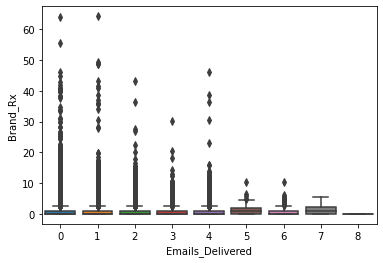

In [ ]:
sns.boxplot(x = df_HVC['Emails_Delivered'], y = df_HVC['Brand_Rx'], data = df_HVC)

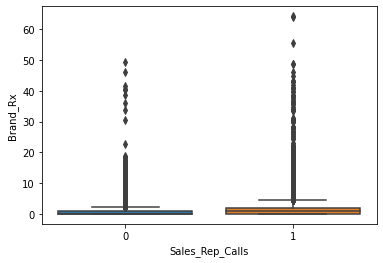

In [ ]:
sns.boxplot(x = df_HVC['Sales_Rep_Calls'], y = df_HVC['Brand_Rx'], data = df_HVC)

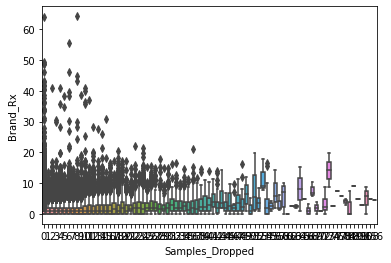

In [ ]:
sns.boxplot(x = df_HVC['Samples_Dropped'], y = df_HVC['Brand_Rx'], data = df_HVC)

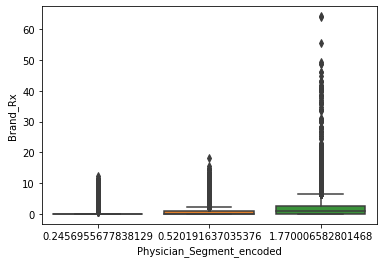

In [ ]:
sns.boxplot(x = df_HVC['Physician_Segment_encoded'], y = df_HVC['Brand_Rx'], data = df_HVC)

In [ ]:
df_HVC['Physician_Segment_encoded'].unique()

array([0.24569557, 1.77000658, 0.52019164])